# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [99]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [101]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [103]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
response = requests.get(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [105]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(response.text, 'html.parser')

In [107]:
# Extract all rows of data
rows = soup.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [123]:
# Create an empty list
rows_list = []

# Loop through the rows of the table, skipping the header row
for row in rows[1:]:  # Skip the first row (header row) if already handled
    cells = row.find_all('td')
    row_data = [cell.get_text(strip=True) for cell in cells]
    rows_list.append(row_data)


# Find the header row
#header_row = soup.find('tr')

# Find the header row, ensuring it's the correct one
header_row = soup.find('thead').find('tr') if soup.find('thead') else soup.find('tr')

# Extract the column names from the header row
column_names = [header.get_text(strip=True) for header in header_row.find_all('th')]

# Extract the text from each header cell
#column_names = [header.get_text(strip=True) for header in header_row.find_all('th')]

# Print the column names to confirm success
print(column_names)



['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [129]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows_list, columns=column_names)

In [131]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [133]:
# Examine data type of each column
#df.info()
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [135]:
# Change data types for data analysis
df['id'] = df['id'].astype(object)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].fillna(0).astype(int)
df['ls'] = df['ls'].fillna(0).astype(int)
df['month'] = df['month'].fillna(0).astype(int)
df['min_temp'] = df['min_temp'].fillna(0.0).astype(float)
df['pressure'] = df['pressure'].fillna(0.0).astype(float)



In [137]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [139]:
# 1. How many months are there on Mars?
unique_months = df['month'].nunique()
unique_months

12

In [149]:
# 2. How many sols (Martian days) worth of data are there?
unique_sols = df['sol'].nunique()
unique_sols

1867

In [153]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
avg_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

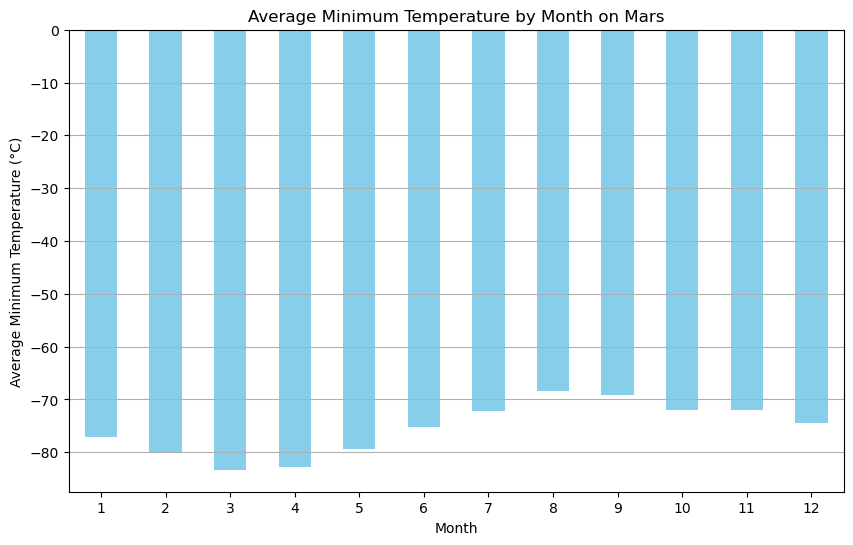

In [155]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()

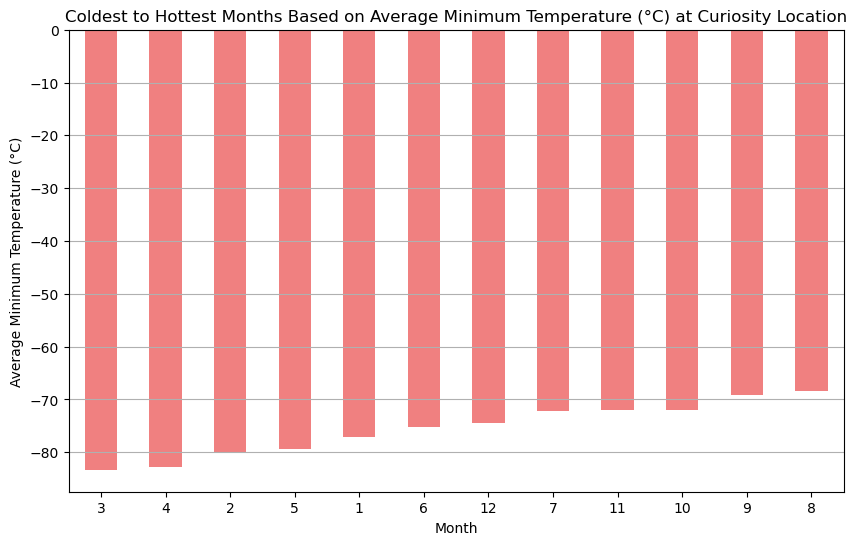

In [157]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
import matplotlib.pyplot as plt

# Group by 'month' and calculate the average minimum temperature for each month
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Sort the months based on the average minimum temperature (coldest to hottest)
sorted_avg_min_temp = avg_min_temp_by_month.sort_values()

# Plot the sorted bar chart (coldest to hottest)
plt.figure(figsize=(10, 6))
sorted_avg_min_temp.plot(kind='bar', color='lightcoral')
plt.title('Coldest to Hottest Months Based on Average Minimum Temperature (°C) at Curiosity Location')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()


In [159]:
# 4. What is the average pressure by month?
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

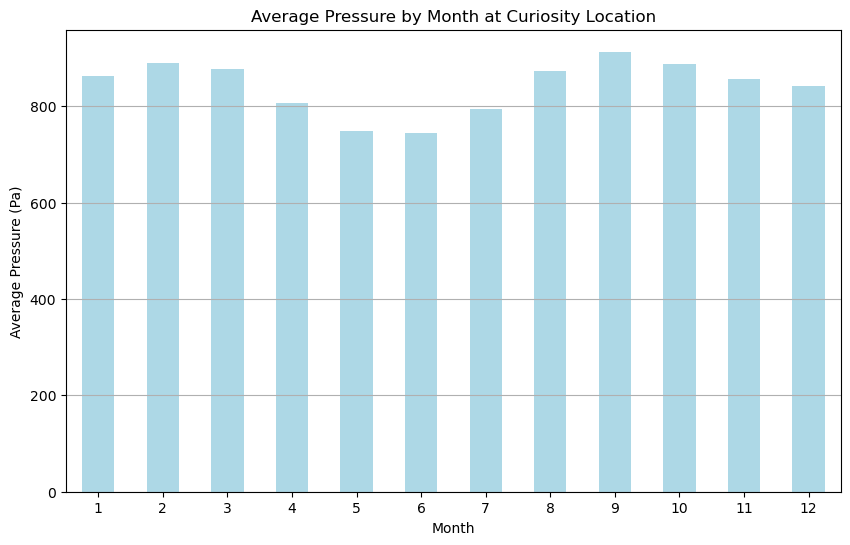

In [161]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='lightblue')
plt.title('Average Pressure by Month at Curiosity Location')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()

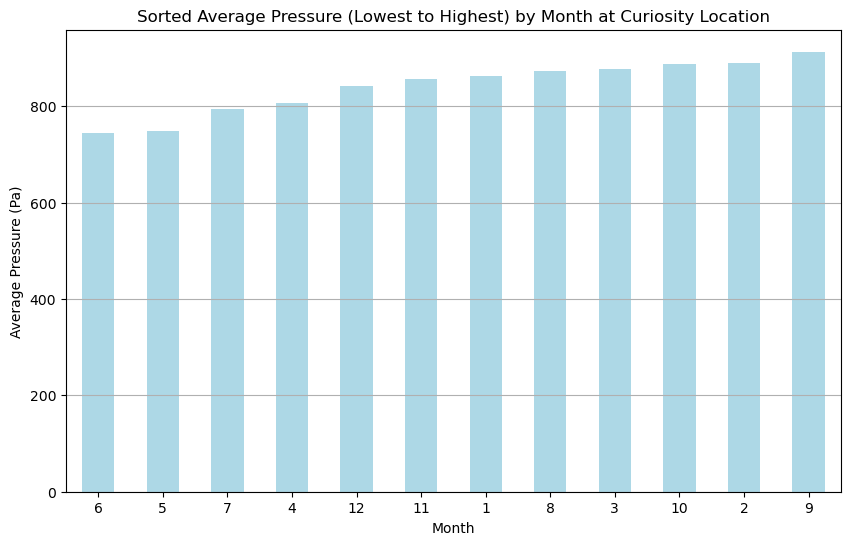

In [165]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Plot the bar chart (showing lowest to highest pressure months)
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Sort the months by average pressure (ascending: lowest to highest)
sorted_avg_pressure = avg_pressure_by_month.sort_values()

# Plot the bar chart (showing lowest to highest pressure months)
plt.figure(figsize=(10, 6))
sorted_avg_pressure.plot(kind='bar', color='lightblue')
plt.title('Sorted Average Pressure (Lowest to Highest) by Month at Curiosity Location')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()

# Show the plot

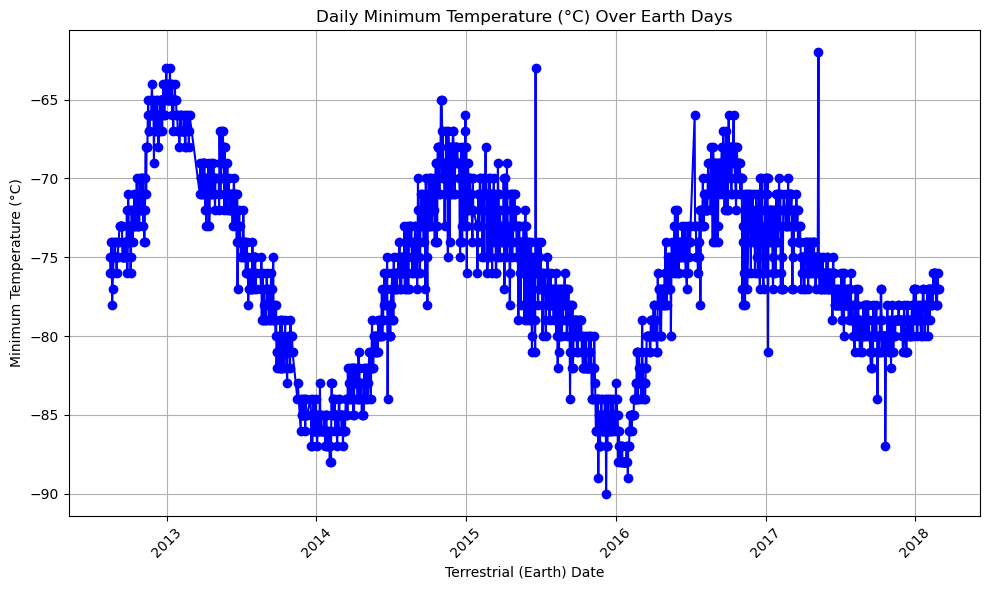

In [169]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
earth_days_in_martian_year = 687
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Plot the daily minimum temperature
plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], marker='o', linestyle='-', color='b')
plt.title('Daily Minimum Temperature (°C) Over Earth Days')
plt.xlabel('Terrestrial (Earth) Date')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

#### Minimum Temperature

YOUR ANALYSIS HERE

In [173]:
# Find the minimum temperature in the dataset
min_temperature = df['min_temp'].min()

# Find the corresponding terrestrial date when the minimum temperature occurred
min_temp_date = df.loc[df['min_temp'].idxmin(), 'terrestrial_date']

# Print the results
print(f"The minimum temperature recorded is {min_temperature}°C")
print(f"This occurred on {min_temp_date}")

The minimum temperature recorded is -90.0°C
This occurred on 2015-12-09 00:00:00


#### Atmospheric Pressure

YOUR ANALYSIS HERE

In [175]:
# Find the minimum atmospheric pressure in the dataset
min_pressure = df['pressure'].min()

# Find the date when the minimum pressure occurred
min_pressure_date = df.loc[df['pressure'].idxmin(), 'terrestrial_date']

# Find the maximum atmospheric pressure in the dataset
max_pressure = df['pressure'].max()

# Find the date when the maximum pressure occurred
max_pressure_date = df.loc[df['pressure'].idxmax(), 'terrestrial_date']

# Print the results
print(f"The minimum atmospheric pressure recorded is {min_pressure} Pa")
print(f"This occurred on {min_pressure_date}")
print(f"The maximum atmospheric pressure recorded is {max_pressure} Pa")
print(f"This occurred on {max_pressure_date}")


The minimum atmospheric pressure recorded is 727.0 Pa
This occurred on 2018-02-27 00:00:00
The maximum atmospheric pressure recorded is 925.0 Pa
This occurred on 2013-01-27 00:00:00


#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [183]:
# Write the data to a CSV
# Write the DataFrame to a CSV file
# Specify the full path where the CSV will be saved
file_path = '/Users/acenyong/Desktop/Data_Science/11/curiosity_data.csv'

# Write the DataFrame to the CSV file
df.to_csv(file_path, index=False)

print(f"Data has been written to {file_path}")




Data has been written to /Users/acenyong/Desktop/Data_Science/11/curiosity_data.csv


In [185]:
browser.quit()